In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

# to study
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
print(train_images.shape)


(60000, 28, 28)


In [4]:

def print_raw_data_img(num_image):
    img = train_images[num_image]
    print(img)

print_raw_data_img(42)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230
   30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 25

In [5]:
array_a  = np.array([[0,1,2], [3,4,5], [6,7,8]])

max_value = np.max(array_a)
print(max_value)

print(array_a.shape) # (2,3)
print(array_a) # (2,3)
print(array_a[1][1]) # 4 prima riga prima colonna

# nornalizzazione
array_a = (array_a / max_value)

print(array_a.shape)
print(array_a)
print(array_a[1][1])


# Appiattimento
array_a = array_a.reshape(-1, 1)

print(array_a.shape)
print(array_a)




8
(3, 3)
[[0 1 2]
 [3 4 5]
 [6 7 8]]
4
(3, 3)
[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]
0.5
(9, 1)
[[0.   ]
 [0.125]
 [0.25 ]
 [0.375]
 [0.5  ]
 [0.625]
 [0.75 ]
 [0.875]
 [1.   ]]


In [6]:
# Preprocessing dei dati

# normalizzazione
train_images = (train_images / 255)
test_images = (test_images / 255)

# appiattimento di ogni immagine da un array 28x28 ad un array di 784 pixel
train_images = train_images.reshape(-1, 28*28) # 784
test_images = test_images.reshape(-1, 28*28)


In [9]:
# trasformazione delle label tramite hot-encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
# creazione del modello
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(10, activation='softmax'))

# compilazione del modello
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                12560     
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 16)               

In [11]:
history = model.fit(
    x=train_images, # training dataset
    y=train_labels, # training labels
    epochs=50,
    batch_size=512,
    validation_data=(
        test_images, # testing dataset
        test_labels  # testing labels
    )
)


Epoch 1/50


2024-01-13 11:20:12.020303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-01-13 11:20:12.073640: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


118/118 [==============================] - 3s 15ms/step - loss: 7.0177 - accuracy: 0.1924 - val_loss: 10.4794 - val_accuracy: 0.2066
Epoch 2/50
118/118 [==============================] - 2s 13ms/step - loss: 7.6865 - accuracy: 0.3049 - val_loss: 5.1055 - val_accuracy: 0.3983
Epoch 3/50
118/118 [==============================] - 2s 13ms/step - loss: 5.2453 - accuracy: 0.3709 - val_loss: 13.5966 - val_accuracy: 0.3206
Epoch 4/50
118/118 [==============================] - 1s 13ms/step - loss: 87.5185 - accuracy: 0.2226 - val_loss: 72.6676 - val_accuracy: 0.2526
Epoch 5/50
118/118 [==============================] - 1s 13ms/step - loss: 1084.0940 - accuracy: 0.2228 - val_loss: 2982.5291 - val_accuracy: 0.1149
Epoch 6/50
118/118 [==============================] - 1s 13ms/step - loss: 921.4872 - accuracy: 0.1723 - val_loss: 365.7758 - val_accuracy: 0.2048
Epoch 7/50
118/118 [==============================] - 1s 13ms/step - loss: 286.4423 - accuracy: 0.2110 - val_loss: 225.4115 - val_accuracy:

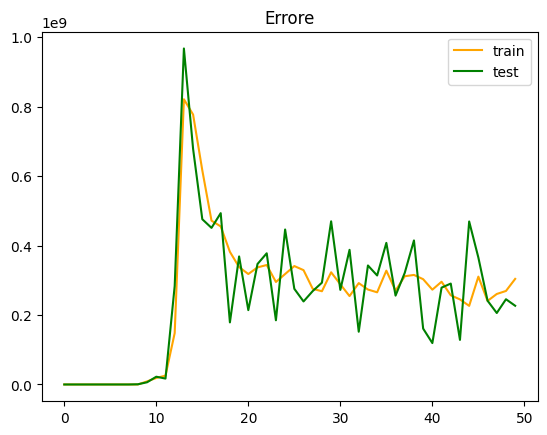

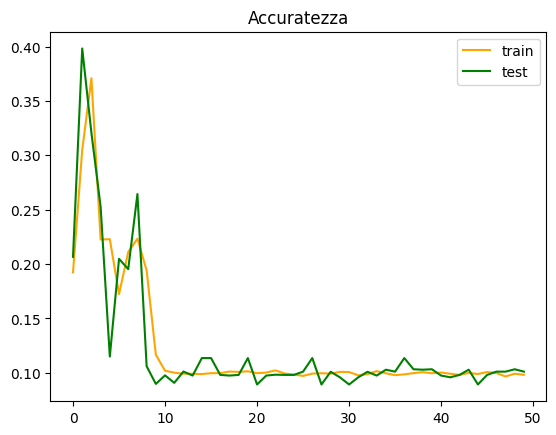

In [12]:
# stampe risultati

# errore modello
plt.plot(history.history['loss'], color='orange', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.title('Errore')
plt.legend()
plt.show()

# Accuratezza del modello
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.title("Accuratezza")
plt.legend()
plt.show()